['119', '128', '114', '124'] A-A
['150', '160', '152', '158', '172', '170', '157'] B-B
['154', '151', '163', '157', '168', '162', '161'] C-C
['137', '135', '139', '143', '145', '148'] D-D
['174', '178', '181', '176', '116'] E-E
['185', '186', '176', '138', '183'] F-F
['133', '131', '141', '145', '147', '132'] G-G
['123', '121', '127', '126', '115', '128'] h-h
['187', '184', '175', '146', '136', '148', '112', '122', '113', '158', '155', '164', '154'] i-i
['117', '125', '121', '112', '132', '130', '165'] j-j
['171'] k-k
['119'] l-l
['171', '166', '149', '167', '169'] m-m
Tikamgarh


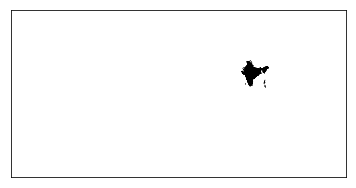

ValueError: Image size of 174234x155378 pixels is too large. It must be less than 2^16 in each direction.

In [19]:
def get_sections():
    profiles=load_pkl(base_folder+'profiles.pkl')
    sections=[]
    for profile in profiles:
        sections.append([p[0] for p in profile])
    return sections
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
#         print(loc)
        coords=vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float)[0]
#         print(coords)
        loc_coords.append(coords)
    return loc_coords

def basemap_plot(vesdf,crooked_line,image_name):
    file="D:\AI-ML\census\IND_adm\IND_adm2"
    map= Basemap()
    shp_info=map.readshapefile(file, 'IND_adm2')
    for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
        if(info['NAME_2']=='Tikamgarh'):
            print(info['NAME_2'])
            x, y = zip(*lightning) 
            break
    coords=np.array(lightning)

    lonpt, latpt = map(coords[:,0],coords[:,1],inverse=True)
    color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
    facies_colors=[color_def[l] for l in color_def]
    facies_colors.extend(['#CCCCCC', '#B00600', '#B006A0'])
    # divfac=10

#     vesdf,data_dfs=load_pkl('tikamgarh.pkl')
    labels=['Block', 'Date', 'Direction of Schlumberger Array', 'Distt',  
                   'Geology','Location', 'RL', 'VES No.', 'Water Table']
    d4plots=vesdf['VES No.'].values
    E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
    divfac=4
    lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac


    fig=plt.figure(figsize=(12,12),dpi=80, facecolor='w', edgecolor='k')
    map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24379)
    shp_info=map.readshapefile(file, 'IND_adm2')
    ix,iy=map(x, y)
    map.plot(ix, iy, marker=None,color='g')
    i=1
    for crooked_line in crooked_lines[0:2]:
        cl=crooked_line.copy()
        cl[:,0],cl[:,1]=map(crooked_line[:,0],crooked_line[:,1])
        map.plot(cl[:,0],cl[:,1],facies_colors[i],linewidth=5) 
        i+=1
    
    No = len(coords[:,0])
    area = 4 * np.ones(No)
    px,py=map(E,N)
    map.plot(cl[:,0],cl[:,1],'k',linewidth=5) 

    map.drawmapscale(78.50, 24.5, 0, 0, 40)
    # map.drawarrow()
    parallels =np.arange(24.2, 25.8,0.4)
    # labels = [left,right,top,bottom]
    map.drawparallels(parallels,labels=[False,True,True,False])
    meridians =  np.arange(78.2, 79.6,0.4)
    map.drawmeridians(meridians,labels=[True,False,False,True])
    map.drawmapboundary(fill_color='#dFdFdF',linewidth=4.0)
    plt.scatter(px,py,s=100, marker='o',c='r')
    for i, txt in enumerate(d4plots):
            plt.annotate(txt, (px[i]+1000, py[i]+100))
    plt.show()
    fig.savefig(image_name+'_bmap.png')
 
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import  Polygon
from mpl_toolkits.basemap import Basemap as Basemap

import sys
sys.path.append('..')
from pickle_fns import *
    
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
crooked_lines=[]
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),vesdf.RL.values.astype(np.float)

sections=get_sections()
sec_image_names=['A-A','B-B','C-C','D-D','E-E','F-F','G-G','h-h','i-i','j-j','k-k','l-l','m-m','n-n']

for section,sec_name in zip(sections,sec_image_names):
#     if i==1:
        print(section,sec_name)
        crooked_lines.append(np.array(design_crooked_section(section,vesdf)))
basemap_plot(vesdf,crooked_lines,'basemap_of_fence')

In [16]:
crooked_lines

[[array([ 79.80932,  25.40122]),
  array([ 79.8442 ,  25.45128]),
  array([ 79.85957,  25.48371]),
  array([ 79.88867,  25.53184])],
 [array([ 79.71526,  25.1458 ]),
  array([ 79.73988,  25.1923 ]),
  array([ 79.80843,  25.27861]),
  array([ 79.87275,  25.35814]),
  array([ 79.94946,  25.42425]),
  array([ 79.97585,  25.45289]),
  array([ 80.00813,  25.47435])],
 [array([ 80.01745,  25.38146]),
  array([ 80.01749,  25.39664]),
  array([ 80.00646,  25.41491]),
  array([ 80.00813,  25.47435]),
  array([ 79.9866 ,  25.51054]),
  array([ 79.9622 ,  25.55231]),
  array([ 79.97214,  25.59369])],
 [array([ 79.48028,  25.10518]),
  array([ 79.51404,  25.144  ]),
  array([ 79.5399 ,  25.19305]),
  array([ 79.56472,  25.23505]),
  array([ 79.60027,  25.27384]),
  array([ 79.62118,  25.33563])],
 [array([ 79.33486,  25.37241]),
  array([ 79.41608,  25.41624]),
  array([ 79.4512 ,  25.41689]),
  array([ 79.52131,  25.42045]),
  array([ 79.61991,  25.44475])],
 [array([ 79.39969,  25.50116]),
  arr

In [14]:
loc='112'
vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values[0]

array(['79.70821', '25.39074'], dtype=object)